**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 2

**Datos de la entrega:** Lunes 23 de Octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Valeria Prado Rodríguez
- Jean Paul Rodríguez Flores





___

# Parte 1  -  Regresión (50 puntos)
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [2]:
# Bibliotecas requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### 1 (5 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


   carat  depth  table     x     y     z  cut  price
0   0.23   61.5   55.0  3.95  3.98  2.43    4    326
1   0.21   59.8   61.0  3.89  3.84  2.31    3    326
2   0.23   56.9   65.0  4.05  4.07  2.31    1    327
3   0.29   62.4   58.0  4.20  4.23  2.63    3    334
4   0.31   63.3   58.0  4.34  4.35  2.75    1    335
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   x       53940 non-null  float64
 4   y       53940 non-null  float64
 5   z       53940 non-null  float64
 6   cut     53940 non-null  int64  
 7   price   53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
None
              carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.0

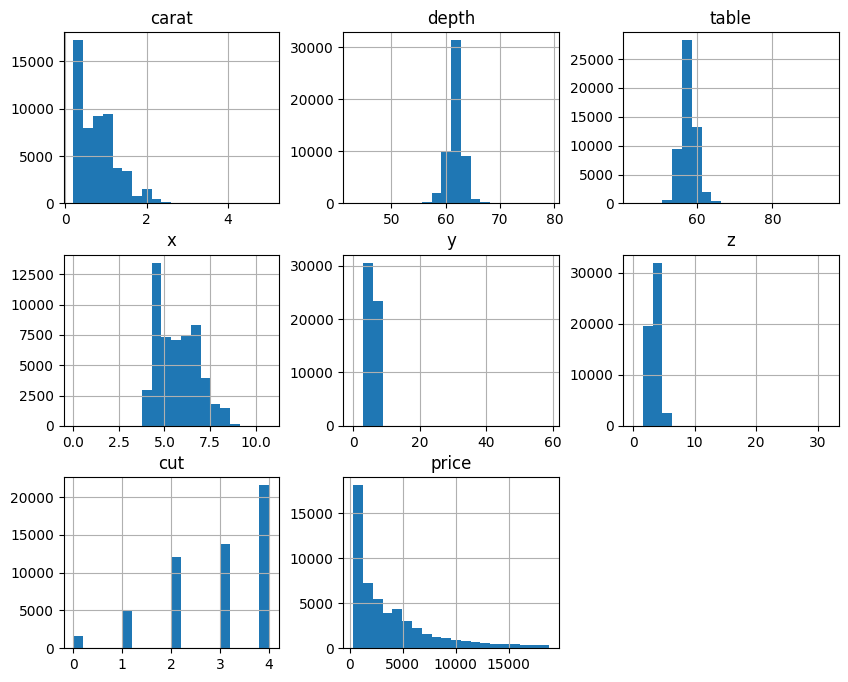

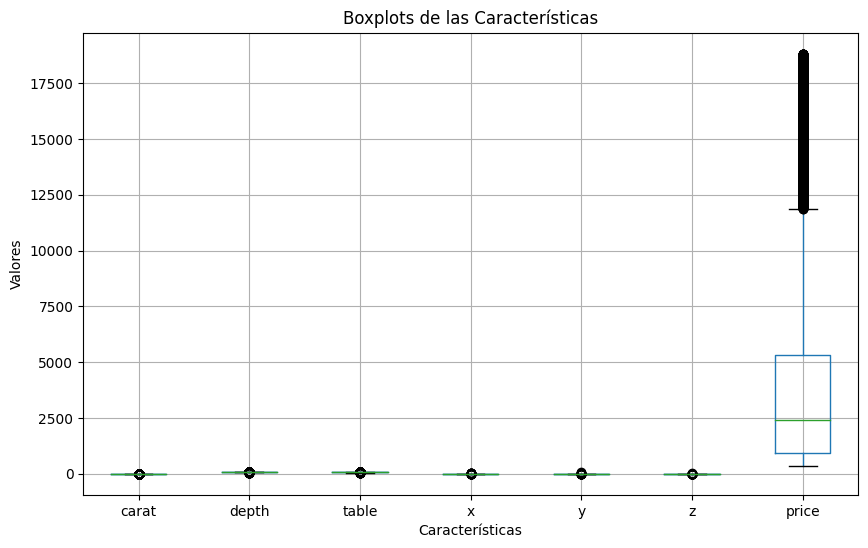

In [3]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('diamonds.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(data.head())

# Mostrar información general sobre el DataFrame
print(data.info())

# Estadísticas descriptivas para atributos numéricos
print(data.describe())

# Visualizar histogramas para variables numéricas
data.hist(bins=20, figsize=(10, 8))
plt.show()

columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Visualizar boxplots para identificar valores atípicos
plt.figure(figsize=(10, 6))
data[columnas].boxplot()
plt.title('Boxplots de las Características')
plt.ylabel('Valores')
plt.xlabel('Características')
plt.show()

Conclusiónes de los atributos:

carat: La mayoría de los diamantes son de pequeño a mediano tamaño, con un promedio de alrededor de 0.8 carats.
Sin embargo, hay algunos diamantes grandes, con un máximo de 5.01 carats.

depth: La profundidad de los diamantes tiene una distribución bastante normal con un promedio cercano al 61.75%.
Algunos diamantes tienen una profundidad inusualmente baja (cerca del 43%) o alta (hasta el 79%).

table: La mayoría de los diamantes tienen un ancho de la parte superior (table) entre 56% y 59%. Algunos tienen
valores inusuales, tanto en el extremo bajo como en el alto.

price: El precio de los diamantes varía considerablemente, desde unos pocos cientos hasta más de 18,000. Hay una
gran variabilidad en los precios.

x, y, z: Estas columnas representan las dimensiones del diamante. La mayoría de los valores parecen razonables,
pero hay algunos diamantes con dimensiones inusualmente pequeñas (cerca de 0), lo que podría ser un error en los datos.

cut: Esta columna parece representar la calidad del corte del diamante. Los valores van de 0 a 4.

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%).
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [4]:
# Dividir los conjuntos
X = data.drop(columns=['price'])  # características
y = data['price']  # variable objetivo

# Dividir los datos en Train/Validation y Test (70-30)
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Mostrar los primeros 5 registros de cada conjunto
print("Primeros 5 registros de X_trainVal:")
print(X_trainVal[:5])  # Muestra las primeras 5 filas de X_trainVal
print("\n")

print("Primeros 5 registros de X_test:")
print(X_test[:5])  # Muestra las primeras 5 filas de X_test
print("\n")

print("Primeros 5 registros de y_trainVal:")
print(y_trainVal[:5])  # Muestra las primeras 5 filas de y_trainVal
print("\n")

print("Primeros 5 registros de y_test:")
print(y_test[:5])  # Muestra las primeras 5 filas de y_test

Primeros 5 registros de X_trainVal:
       carat  depth  table     x     y     z  cut
19497   1.21   61.3   57.0  6.92  6.87  4.23    4
31229   0.31   62.0   56.0  4.38  4.36  2.71    4
22311   1.21   62.4   57.0  6.75  6.83  4.24    4
278     0.81   62.6   55.0  5.92  5.96  3.72    4
6646    0.79   61.7   56.0  5.94  5.95  3.67    4


Primeros 5 registros de X_test:
       carat  depth  table     x     y     z  cut
1388    0.24   62.1   56.0  3.97  4.00  2.47    4
50052   0.58   60.0   57.0  5.44  5.42  3.26    2
41645   0.40   62.1   55.0  4.76  4.74  2.95    4
42377   0.43   60.8   57.0  4.92  4.89  2.98    3
17244   1.55   62.3   55.0  7.44  7.37  4.61    4


Primeros 5 registros de y_trainVal:
19497     8131
31229      756
22311    10351
278       2795
6646      4092
Name: price, dtype: int64


Primeros 5 registros de y_test:
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
Name: price, dtype: int64


shuffle: Este parámetro decide si se deben mezclar los datos antes de dividirlos. Mezclar los datos asegura que el
modelo no se vea influenciado por ningún patrón de orden en los datos. Es importante mezclar los datos para evitar
cualquier sesgo en el modelo. Por lo tanto, es recomendable establecer shuffle=True.

random_state: Este parámetro se utiliza para iniciar el generador de números aleatorios. Establecer un valor fijo
para random_state asegura que cada vez que se ejecuta el código, se obtendra la misma división de datos. Esto es útil
para la reproducibilidad de los resultados, especialmente cuando se esta compartiendo el código o cuando se necesita
comparar los resultados en diferentes ejecuciones. Por lo tanto, es una buena práctica establecer random_state a
un número fijo, por ejemplo, random_state=42.

### 3  (10 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

<Axes: >

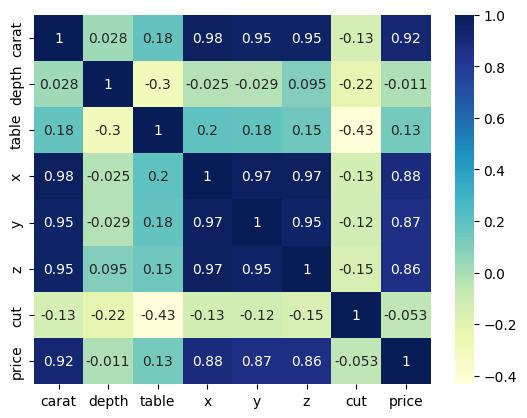

In [5]:
# Matriz de correlación entre variables numéricas
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True, cmap='YlGnBu')

Atributos Categóricos:

La columna cut es una variable categórica codificada numéricamente. Seva a aplicar la tecnica One-Hot Encoding, para asegurarse de que el modelo no interprete estas categorías como números con algún significado ordinal.


In [6]:
# Aplicar One-Hot Encoding a la columna 'cut'
# El argumento drop_first=True se utiliza para evitar la trampa de la multicolinealidad, eliminando la primera columna codificada
X_trainVal = pd.get_dummies(X_trainVal, columns=['cut'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['cut'], drop_first=True)

Valores Atípicos:

Las columnas carat, depth, table, x, y, z y price tienen valores atípicos notables. Estos valores extremos pueden afectar negativamente la precisión de algunos modelos, especialmente aquellos sensibles a los outliers. Se va a utilizar la tecnica de transformacion para manejarlos y no perder datos.

In [7]:
# Lista de columnas a transformar
columnas_a_transformar = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Aplicar transformación logarítmica a las columnas de X_trainVal y X_test
X_trainVal[columnas_a_transformar] = X_trainVal[columnas_a_transformar].apply(lambda x: np.log1p(x))
X_test[columnas_a_transformar] = X_test[columnas_a_transformar].apply(lambda x: np.log1p(x))

# Aplicar transformación logarítmica de y_trainVal y y_test

y_trainVal = np.log1p(y_trainVal)
y_test = np.log1p(y_test)

### 4 (5 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


La elección del Embedded Method, específicamente la técnica de regularización Lasso, para la selección de atributos se basa en su capacidad para automatizar el proceso, eliminando características menos importantes durante el entrenamiento del modelo. Este método es eficaz para manejar la multicolinealidad, reduciendo el impacto de variables altamente correlacionadas. Además, la regularización Lasso previene el sobreajuste al penalizar los coeficientes de las características menos relevantes, mejorando así la generalización del modelo.

In [8]:
# Escalar características para la regularización Lasso
scaler = StandardScaler()
X_trainVal_scaled = scaler.fit_transform(X_trainVal)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo Lasso con validación cruzada incorporada para la selección de alpha
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

# Ajustar el modelo Lasso al conjunto de datos de entrenamiento y validación escalado
lasso.fit(X_trainVal_scaled, y_trainVal)

# Obtener las características seleccionadas por Lasso (coeficientes no nulos)
selected_features_lasso = X_trainVal.columns[lasso.coef_ != 0]

# Filtrar el conjunto de datos con las características seleccionadas por Lasso
X_trainVal_scaled = X_trainVal[selected_features_lasso]
X_test_scaled = X_test[selected_features_lasso]

### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


Se utilizó la técnica de Estandarización o Z-score scaling, que implica calcular la media y la desviación estándar de cada característica en el conjunto de datos y ajustar las características para que tengan una media de 0 y una desviación estándar de 1. Esta técnica fue empleada porque garantiza igualdad de escala entre las características, es invariante a la escala, mejora el rendimiento de muchos algoritmos de aprendizaje automático y proporciona estabilidad en la optimización. Los datos fueron escalados para asegurar que todas las características estén en la misma escala, lo que es esencial para algoritmos que calculan distancias y para la convergencia de algoritmos de optimización.

In [9]:
# Agregar el bias a las características escaladas
X_trainVal_scaled_bias = np.c_[np.ones(X_trainVal_scaled.shape[0]), X_trainVal_scaled]
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Escalar y_trainVal y y_test por separado
scaler_y = StandardScaler()
y_trainVal_scaled = scaler_y.fit_transform(y_trainVal.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Combinar X_trainVal, X_test, y_trainVal y y_test en un solo DataFrame
X_combined = pd.concat([pd.DataFrame(X_trainVal_scaled_bias, columns=['bias'] + list(X_trainVal_scaled.columns)),
                       pd.DataFrame(X_test_scaled_bias, columns=['bias'] + list(X_test_scaled.columns))])

y_combined = pd.concat([pd.Series(y_trainVal_scaled.flatten(), name='price'),
                        pd.Series(y_test_scaled.flatten(), name='price')])

# Guardar los datos combinados con el bias en un archivo CSV
combined_data = pd.concat([X_combined, y_combined], axis=1)
combined_data.to_csv('diamondsPROCESADO.csv', index=False)

### 1.6 (15 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionados (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada.
    

In [10]:
def muestreMetricas(py_test, py_pred, psquared):
    metrica = mean_squared_error(py_test, py_pred, squared=psquared)
    # If True returns MSE value, if False returns RMSE value.
    if psquared:
        print("RMSE: ", metrica)
    else:
        print("MSE: ", metrica)
    print("R2: ", r2_score(py_test, py_pred) )

In [11]:
print( "OLSR")

reg = linear_model.LinearRegression( fit_intercept=True).fit(X_trainVal_scaled_bias, y_trainVal_scaled)
y_pred = reg.predict(X_test_scaled_bias)
mns1 = mean_squared_error(y_test_scaled, y_pred, squared=False)
r21 = r2_score(y_test_scaled, y_pred)
muestreMetricas(y_test_scaled, y_pred, False)
print( "Coeficientes: ", reg.coef_ )
print( "Intersección: ", reg.intercept_ )


OLSR
MSE:  0.27530892570064425
R2:  0.9235023243075172
Coeficientes:  [[0.         1.67963901 0.35780019 1.5415282  1.62022762 0.26988777
  0.12613563 0.18240671 0.17061907 0.24539164]]
Intersección:  [-9.00248578]


Para OLSR la metrica a utilizar es R2 Score para evaluar el modelo. R2 Score representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. En este caso, un R2 de 0.9235 indica que aproximadamente el 92.35% de la variabilidad en los datos de respuesta (precio) puede ser explicada por las características seleccionadas.

Además, un R2 cercano a 1 sugiere que el modelo se ajusta muy bien a los datos, lo cual es un buen indicativo de la calidad del modelo. Por lo tanto, la elección de R2 como métrica es válida y proporciona una comprensión sólida del rendimiento del modelo OLSR en este contexto.

In [12]:
# Nota: El codigo dura 1 minuto en ejecutarse

# Definir los hiperparámetros a buscar
# Definir los hiperparámetros a buscar (reducidos para acelerar la búsqueda)
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

# Inicializar el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Configurar la búsqueda de hiperparámetros usando validación cruzada (con menos folds)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entrenar el modelo usando todo el conjunto de entrenamiento y validación
grid_search.fit(X_trainVal_scaled_bias, y_trainVal_scaled.flatten())

# Resto del código


# Obtener el mejor modelo y sus métricas
best_gbr = grid_search.best_estimator_
best_r2 = grid_search.best_score_

# Imprimir los resultados
print("Gradient Boosting Regressor")
print("Best R2 Score: ", best_r2)
print("Best Parameters: ", grid_search.best_params_)

# Predecir usando el conjunto de prueba
y_pred_gbr = best_gbr.predict(X_test_scaled_bias)

# Calcular y mostrar las métricas RMSE y R2 para el conjunto de prueba
mns2 = mean_squared_error(y_test_scaled.flatten(), y_pred_gbr, squared=False)
muestreMetricas(y_test_scaled.flatten(), y_pred_gbr, False)

Se eligio R2 como la métrica principal para evaluar el rendimiento del modelo porque proporciona una medida relativa de la variabilidad explicada por el modelo en comparación con el modelo de línea base. En este caso, el mejor modelo de Gradient Boosting Regressor alcanzó un R2 de 0.9461, lo que significa que aproximadamente el 94.61% de la variabilidad en los datos de prueba se explica por el modelo. Este alto valor de R2 indica que el modelo es altamente efectivo para predecir los precios de los diamantes en el conjunto de datos, respaldando así su selección como la métrica principal para evaluar la calidad del modelo. Además, R2 es una métrica estándar en la evaluación de modelos de regresión, lo que facilita la comparación con otros modelos y su interpretación en el contexto del problema.

### 1.7 (5 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.

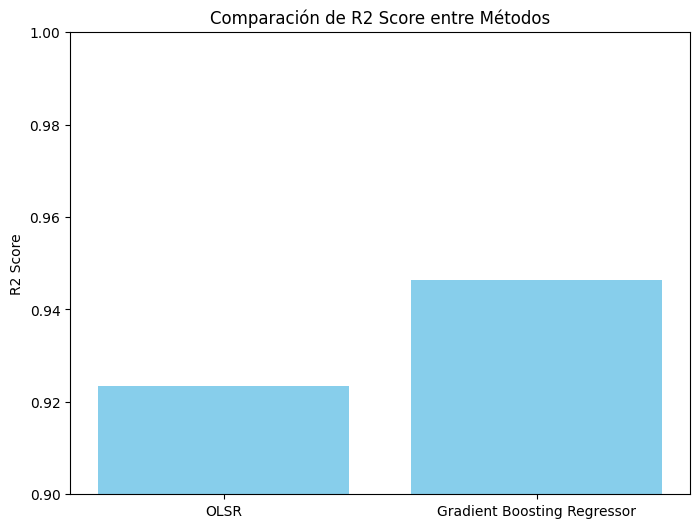

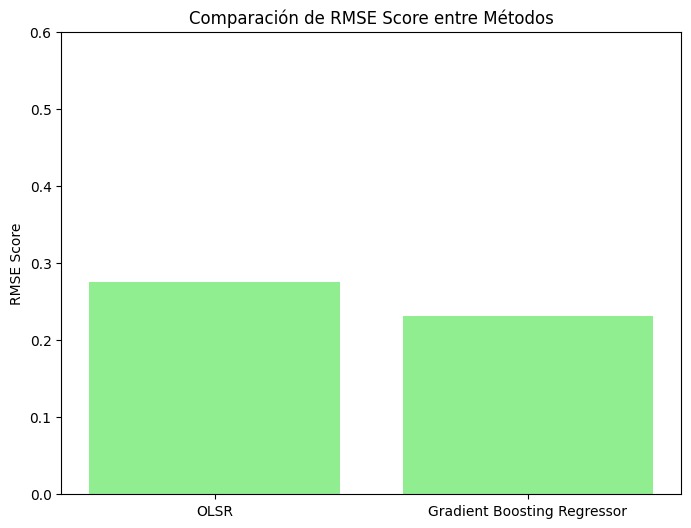

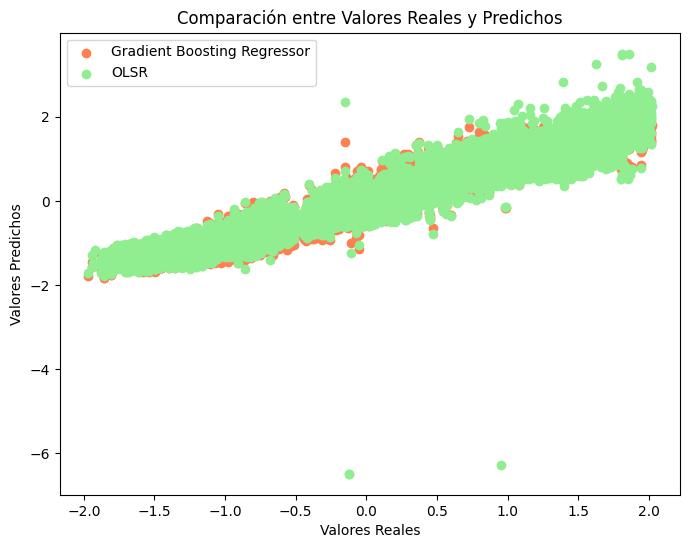

In [ ]:
# Datos
metodos = ['OLSR', 'Gradient Boosting Regressor']
r2_scores = [r21, best_r2]
rmse_scores = [mns1, mns2]

# Crear gráfico de barras para R2
plt.figure(figsize=(8, 6))
plt.bar(metodos, r2_scores, color='skyblue')
plt.ylabel('R2 Score')
plt.title('Comparación de R2 Score entre Métodos')
plt.ylim(0.9, 1.0)
plt.show()

# Crear gráfico de barras para RMSE
plt.figure(figsize=(8, 6))
plt.bar(metodos, rmse_scores, color='lightgreen')
plt.ylabel('RMSE Score')
plt.title('Comparación de RMSE Score entre Métodos')
plt.ylim(0, 0.6)
plt.show()

# Gráfico de dispersión para valores reales versus predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled.flatten(), y_pred_gbr, color='coral', label='Gradient Boosting Regressor')
plt.scatter(y_test_scaled.flatten(), y_pred, color='lightgreen', label='OLSR')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos')
plt.legend()
plt.show()


Conclusiones finales:

Basado en los resultados obtenidos, tanto el OLSR como el Gradient Boosting Regressor han demostrado ser métodos efectivos para predecir los precios de los diamantes en el conjunto de datos proporcionado. Sin embargo, el Gradient Boosting Regressor ha mostrado un mejor rendimiento en términos de R2 y RMSE en comparación con el OLSR. Esto sugiere que el Gradient Boosting Regressor, especialmente con los hiperparámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}, es el modelo preferido para este problema de predicción de precios de diamantes. Las predicciones de este modelo tienen una alta correlación con los valores reales y presentan errores de predicción relativamente bajos. Esta elección se basa en la precisión de las predicciones y en la capacidad del modelo para explicar la variabilidad en los datos.

___

# Parte 2  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados:
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental.
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda.

Algortimos propuestos:

    -Regresión Logistica
    -Random Forest

Métricas: 

    -Accuracy 
    -F1-Score

___

# Preprocesamiento
___

Bibliotecas:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


Cargar los datos

In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv("cardio.csv", sep=';')

# Mostrar los diez primeros resultados
display(data.head(10))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,3,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,4,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,5,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,6,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,7,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,8,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,9,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,10,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [1]:
import seaborn as sns
correlation_matrix = data.corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

NameError: name 'data' is not defined

Acciones de preprocesamiento:
1. Eliminar columnas irrelevantes (id)
1. Convertir la edad a años para que los resultados sean más intuitivos y fáciles de interpretar
1. Escalar las características numéricas para que tengan una media de 0 y una desviación estándar de 1 (z-score) - Conveniente para Regresion Logistica
1. Codificacion de variables categoricas
1. Se considera el manejo de valores atípicos utilizando el método IQR para identificar y eliminar las filas que contienen valores extremos; sin embargo, por la naturaleza de los datos registrados, se ve afectado el rendimiento.
1. Se usa imputacion de la media para reemplzar datos faltantes.

In [71]:
# 1. Eliminación de la columna 'id'
data = data.drop('id', axis=1)

# 2. Conversión de 'age' a años
data['age'] = data['age'] // 365

# 3. Escalamiento de características numéricas
scaler = StandardScaler()
num_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
data[num_features] = scaler.fit_transform(data[num_features])

# 4. Codificación de variables categóricas
gender_encoder = LabelEncoder()
data['gender'] = gender_encoder.fit_transform(data['gender'])

""" 
# 5. Manejo de Valores Atípicos (utilizando el método IQR)
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((data[num_features] < (Q1 - 1.5 * IQR)) | (data[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outlier_mask]
"""

# 6. Tratamiento de Datos Faltantes (imputación con la mediana)
data[num_features] = data[num_features].fillna(data[num_features].median())


División de datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)

In [45]:
# División de datos en conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%)
X = data.drop('cardio', axis=1)
y = data['cardio']

# Dividir los datos en conjuntos de entrenamiento (60%) y prueba (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Luego, dividir el conjunto temporal en conjuntos de validación (20%) y prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Imprimir el tamaño de cada conjunto de datos
print("Tamaño del conjunto de entrenamiento: {} muestras".format(X_train.shape[0]))
print("Tamaño del conjunto de validación: {} muestras".format(X_val.shape[0]))
print("Tamaño del conjunto de prueba: {} muestras".format(X_test.shape[0]))

Tamaño del conjunto de entrenamiento: 41580 muestras
Tamaño del conjunto de validación: 13860 muestras
Tamaño del conjunto de prueba: 13861 muestras


___

# Random Forest
___
es un método de aprendizaje automático que combina múltiples árboles de decisión para construir un modelo robusto y preciso en problemas de clasificación y regresión. Utiliza muestreo aleatorio, aleatoriedad en la selección de características y proporciona una medida de importancia de características. La predicción final en clasificación se basa en la clase más votada entre los árboles

1. Implementación: 
Se realizó utilizando la biblioteca scikit-learn, con un modelo de Random Forest utilizando la clase RandomForestClassifier.

Esta implementacion considera los siguientes Hiperparámetros: 

            n_estimators: número de árboles 

            max_depth: profundidad máxima de cada árbol.

            min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno del árbol.

            min_samples_leaf: número mínimo de muestras requeridas para ser un nodo hoja.

1. Modelo Experimental:

Aplicando lo anterior, se ajustan hiperparámetros con GridSearchCV, donde se prueban diferentes configuraciones, como el número de árboles (n_estimators), la profundidad máxima (max_depth), el número mínimo de muestras para dividir un nodo (min_samples_split) y el número mínimo de muestras en un nodo hoja (min_samples_leaf). 

    'n_estimators': [100, 200, 300]
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

El modelo se entrena y ajusta utilizando el conjunto de validación, y luego se evalúa en un conjunto de prueba. 

Al final se muestran Los mejores hiperparámetros y el modelo óptimo, ademas se calculan métricas (Accuracy y F1-Score) en el conjunto de prueba. 

Esto permite encontrar la configuración óptima para Random Forest en el problema específico.

Implementacion: (Incluye ajuste de hiperparametros)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Ajuste de hiperparámetros para Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(random_forest_model, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_val, y_val)  # Usar el conjunto de validación para ajustar hiperparámetros
best_rf_model = rf_grid.best_estimator_

# Imprimir el mejor modelo y los mejores parámetros
print("Mejor modelo Random Forest:")
print(best_rf_model)
print("Mejores parámetros Random Forest:")
print(rf_grid.best_params_)

# Predecir en el conjunto de prueba
random_forest_preds = best_rf_model.predict(X_test)

# Calcular métricas en el conjunto de prueba
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
random_forest_f1 = f1_score(y_test, random_forest_preds)

print("Random Forest - Accuracy:", random_forest_accuracy)
print("Random Forest - F1-Score:", random_forest_f1)


Mejor modelo Random Forest:
RandomForestClassifier(max_depth=30, min_samples_leaf=4, random_state=42)
Mejores parámetros Random Forest:
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Accuracy: 0.7239015944015583
Random Forest - F1-Score: 0.7169169317257195


___

#  Regresion Logistica
___ 
es un algoritmo de aprendizaje supervisado utilizado en problemas de clasificación, para predecir clases. Utiliza una función logística para modelar la probabilidad de que una observación pertenezca a una de las clases. Se elige porque es simple y se usa ampliamente en campos como la medicina (que tiene que ver con nuestro conjunto de datos)

1. Implementación: 
Se realizó utilizando la biblioteca scikit-learn, con un modelo de Regresión Logística utilizando la clase LogisticRegression.

Esta implementacion considera el hiperparametro C: controla la fuerza de la regularización en la Regresión Logística. 

Ademas del paramtero random_state: se utiliza para establecer una semilla aleatoria en la inicialización del modelo. Al fijar random_state en un valor específico, se asegura que los resultados sean reproducibles.

1. Modelo Experimental:
El hiperparámetro principal que se ajusta en este modelo experimental es C. Se creó una lista de posibles valores de C [0.001, 0.01, 0.1, 1, 10, 100] que se probarán para encontrar el valor óptimo con GridSearchCV.

Se entrenó el  modelo de Regresión Logística con ese hiperparámetro en el conjunto de validación

Se utiliza Cross-Validation con 5 divisiones (cv=5) para evaluar el rendimiento del modelo en diferentes subconjuntos del conjunto de validación. Esto ayuda a evitar el sobreajuste y proporciona una estimación más precisa del rendimiento.

 El modelo entrenado se evaluó en el conjunto de prueba para calcular Accuracy y F1-Score

 Al final se muestra 
 
    mejor parámetro encontrado (C) 
    el mejor modelo óptimo de Regresión Logística
    las métricas de rendimiento en el conjunto de prueba (Accuracy y F1-Score)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Ajuste de hiperparámetros para Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='f1')
logistic_grid.fit(X_val, y_val)  # Usar el conjunto de validación para ajustar hiperparámetros
best_logistic_model = logistic_grid.best_estimator_

# Imprimir el mejor modelo y los mejores parámetros
print("Mejor modelo Regresión Logística:")
print(best_logistic_model)
print("Mejores parámetros Regresión Logística:")
print(logistic_grid.best_params_)

# Predecir en el conjunto de prueba
logistic_preds = best_logistic_model.predict(X_test)

# Calcular métricas en el conjunto de prueba
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_f1 = f1_score(y_test, logistic_preds)

print("Regresión Logística - Accuracy:", logistic_accuracy)
print("Regresión Logística - F1-Score:", logistic_f1)


Mejor modelo Regresión Logística:
LogisticRegression(C=1, random_state=42)
Mejores parámetros Regresión Logística:
{'C': 1}
Regresión Logística - Accuracy: 0.7230358559988457
Regresión Logística - F1-Score: 0.7123267141251405


___

#  Resultados y Conclusiones
___ 

Tabla de Resultados:
                Modelo  Accuracy  F1-Score
0  Regresión Logística  0.723036  0.712327
1        Random Forest  0.723902  0.716917


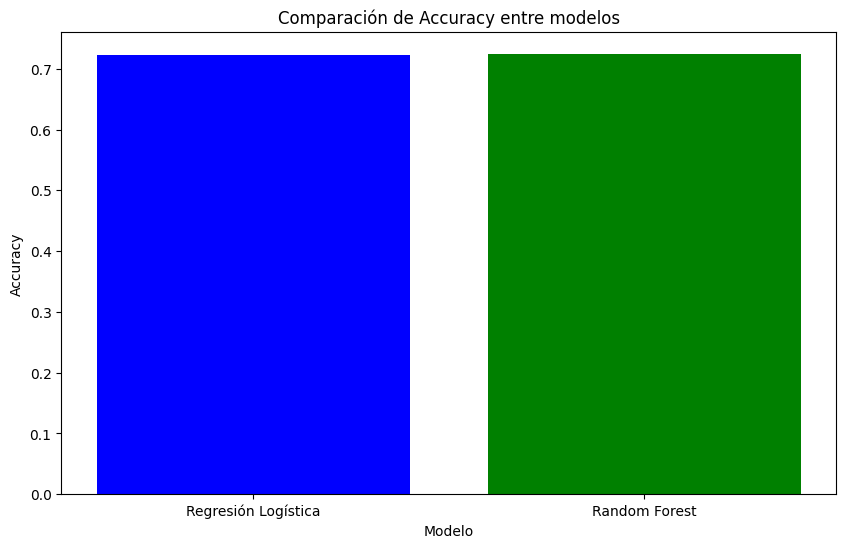

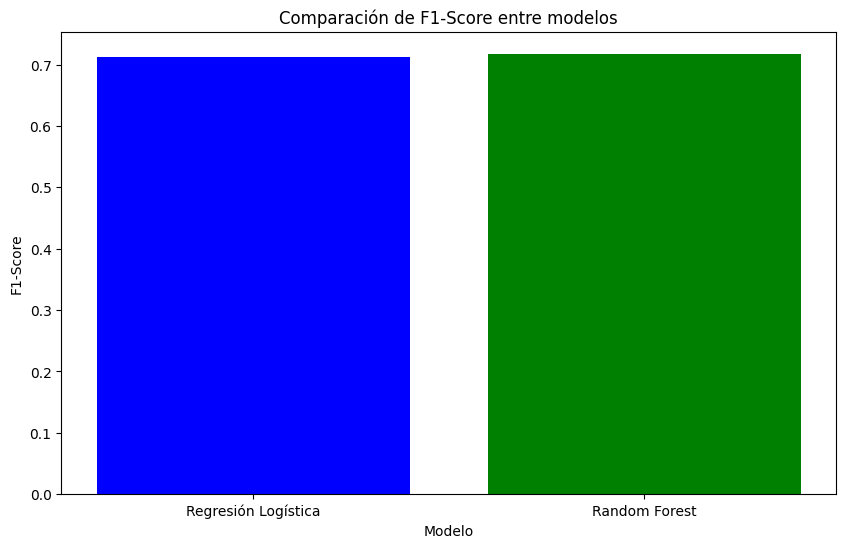

In [54]:
# Crear una tabla de resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Accuracy': [logistic_accuracy, random_forest_accuracy],
    'F1-Score': [logistic_f1, random_forest_f1]
})
# Mostrar la tabla de resultados
print("Tabla de Resultados:")
print(results)

# Generar gráficos
plt.figure(figsize=(10, 6))
plt.bar(results['Modelo'], results['Accuracy'], color=['blue', 'green'])
plt.title('Comparación de Accuracy entre modelos')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results['Modelo'], results['F1-Score'], color=['blue', 'green'])
plt.title('Comparación de F1-Score entre modelos')
plt.xlabel('Modelo')
plt.ylabel('F1-Score')
plt.show()

Aunque el resultado es muy similar para ambos algoritmos, con base en la métrica F1-Score, se recomienda utilizar Random Forest.

Mejores parámetros para Random Forest: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

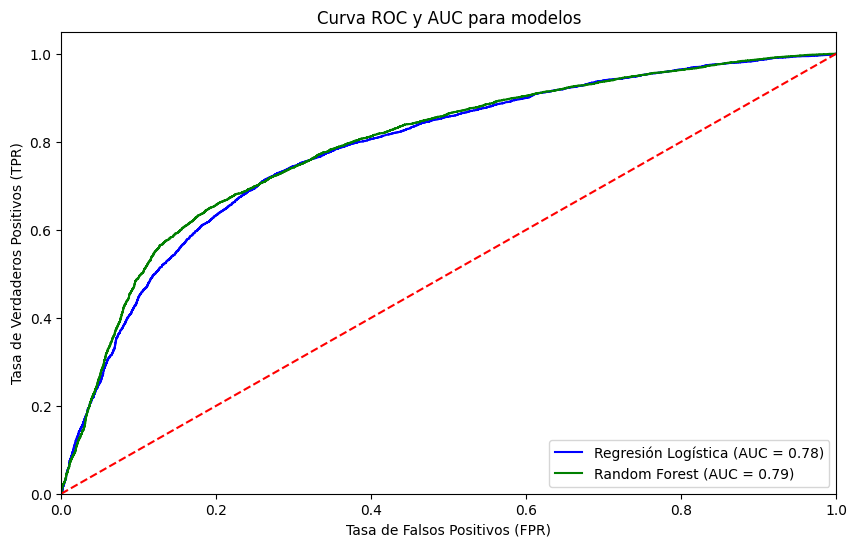

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción para Regresión Logística
logistic_probs = best_logistic_model.predict_proba(X_test)[:, 1]
# Calcular las probabilidades de predicción para Random Forest
random_forest_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para Regresión Logística
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Calcular la curva ROC y AUC para Random Forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
random_forest_auc = roc_auc_score(y_test, random_forest_probs)

# Generar el gráfico de la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label='Regresión Logística (AUC = {:.2f})'.format(logistic_auc))
plt.plot(random_forest_fpr, random_forest_tpr, color='green', label='Random Forest (AUC = {:.2f})'.format(random_forest_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC y AUC para modelos')
plt.legend(loc="lower right")
plt.show()

Random Forest tiene un AUC mayor, lo que indica un mejor rendimiento en la clasificación.

Conclusiones:

Se realizaron dos modelos, Regresión Logística y Random Forest, en un problema de clasificación. Ambos modelos presentaron resultados muy similares en términos de Accuracy y F1-Score.

Aunque los resultados son cercanos, se recomienda utilizar Random Forest. Esto se debe a que obtuvo un puntaje ligeramente superior en la métrica F1-Score, lo que indica un mejor equilibrio entre precisión y exhaustividad en la clasificación. Además, el AUC de Random Forest también es mayor, lo que sugiere un mejor rendimiento general.

Los parámetros óptimos para Random Forest son los siguientes: 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2 y 'n_estimators': 100. Estos valores se encontraron mediante una búsqueda exhaustiva de hiperparámetros.

En resumen: recomendamos usar Random Forest con los hyperparámetros mencionados para este  problema de clasificación, lo elegimos basados en su rendimiento superior en términos de F1-Score y AUC, lo que indica una mejor capacidad de clasificación y una configuración más adecuada para los datos disponibles. Además, en general se recomienda Random Forest debido a su capacidad para manejar conjuntos de datos complejos y la flexibilidad para ajustarse a diferentes tipos de problemas de clasificación.